In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [6]:
def get_data(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start, end)
    stockData = stockData['Close']
    stockReturns = stockData.pct_change()
    meanReturns = stockReturns.mean()
    covMatrix = stockReturns.cov()
    return meanReturns, covMatrix

In [26]:
listOfStocks = ['AAPL', 'TSLA', 'MSFT', 'NVDA', 'AMZN']
colors = ['blue', 'orange', 'green', 'red', 'purple']

In [27]:
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)
meanReturns, covMatrix = get_data(listOfStocks, startDate, endDate)

[*********************100%%**********************]  5 of 5 completed


In [25]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)
print(weights)

[0.31172518 0.18069723 0.23157812 0.22772548 0.04827399]


### now after optimization and getting the data ready, lets start MONTE CARLO SIMULATIONS

In [10]:
n = 100 #no of simulations
T = 100 #no of days
meanM = np.full(shape = (T, len(weights)), fill_value = meanReturns)
meanM = meanM.T
portfolio = np.full(shape = (T, n), fill_value = 0.0)

In [11]:
portfolio_size = float(input("Enter the portfolio size: "))

Enter the portfolio size: 10000


In [13]:
# Monte Carlo Simulation
for m in range(n):
    z = np.random.normal(size=(T, len(weights)))
    lowerTriangular = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(lowerTriangular, z)
    portfolio[:, m] = np.cumprod(np.inner(weights, dailyReturns.T) + 1) * portfolio_size

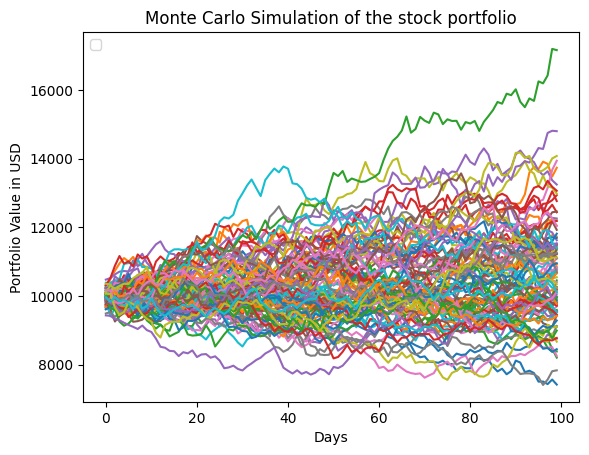

In [22]:
# for idx, color in enumerate(colors):
#     plt.plot(portfolio[:, idx], color=color, label=listOfStocks[idx])

plt.plot(portfolio)

plt.ylabel('Portfolio Value in USD')
plt.xlabel('Days')
plt.title('Monte Carlo Simulation of the stock portfolio')
plt.legend(loc='upper left')
plt.show()